In [1]:
import regex as re
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel('df_completo.xlsx')

In [3]:
#dados_1 = dados['Abstract'][1421]
#print(dados_1)

In [4]:
print(dados['Abstract'])

0        We investigated the associations between dieta...
1        Plasma carotenoid responses were determined in...
2        Problem: Chronic diseases and conditions (e.g....
3        Background: The prevalence of obese adult wome...
4        Fatty liver is the earliest and most common re...
                               ...                        
10408    Attention-deficit/hyperactivity disorder (ADHD...
10409    Personalized medicine is a new framework for m...
10410    More remains unknown than known about how to o...
10411    Background Epstein Barr Virus (EBV) infects 90...
10412    Objectives: Opioid pain medication misuse is a...
Name: Abstract, Length: 10413, dtype: object


In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
# List of common cancer and tumor types
cancer_types_list = ["breast", "lung", "prostate", "colon", "rectal", "skin", "leukemia", "lymphoma", "melanoma", "ovarian", "pancreatic", "brain", "bone", "liver", "kidney", "cervical", "uterine", "bladder", "testicular", "thyroid"]

# List of terms potentially following cancer types
following_terms = ['cancer', 'tumor', 'carcinoma', 'sarcoma', 'leukemia', 'lymphoma', 'myeloma']

# Construct regex pattern to match cancer types followed by the specified terms
pattern_template = r"\b(?:{})\s*(?:{})\b"
cancer_types_pattern = re.compile(pattern_template.format('|'.join(cancer_types_list), '|'.join([f"{term}s?" for term in following_terms])), re.IGNORECASE)

dados_extraidos = []

nlp = spacy.load('en_core_web_sm')  # Load English language model

for i, abstract in enumerate(dados['Abstract']):
    doc = nlp(str(abstract))
    for sentence in doc.sents:
        # Find all occurrences of cancer types followed by specified terms
        matches = cancer_types_pattern.findall(str(sentence))
        for match in matches:
            # Extract only the type of cancer from the match
            cancer_type = re.match(r'^(\w+)', match.lower()).group(1)
            # Append the found cancer type to the list
            dados_extraidos.append({'Cancer Type': cancer_type})

# Create DataFrame from the list of dictionaries
dados_extraidos_df = pd.DataFrame(dados_extraidos)

# Count occurrences of each cancer type
cancer_type_counts = dados_extraidos_df['Cancer Type'].value_counts()

# Convert Series to DataFrame with appropriate column names
cancer_type_counts_df = cancer_type_counts.reset_index()
cancer_type_counts_df.columns = ["Cancer Type", "Counts"]

# Export cancer_type_counts to an Excel file
cancer_type_counts_df.to_excel("cancer_type_counts.xlsx", index=False)

print("Exported cancer_type_counts to cancer_type_counts.xlsx")


Exported cancer_type_counts to cancer_type_counts.xlsx


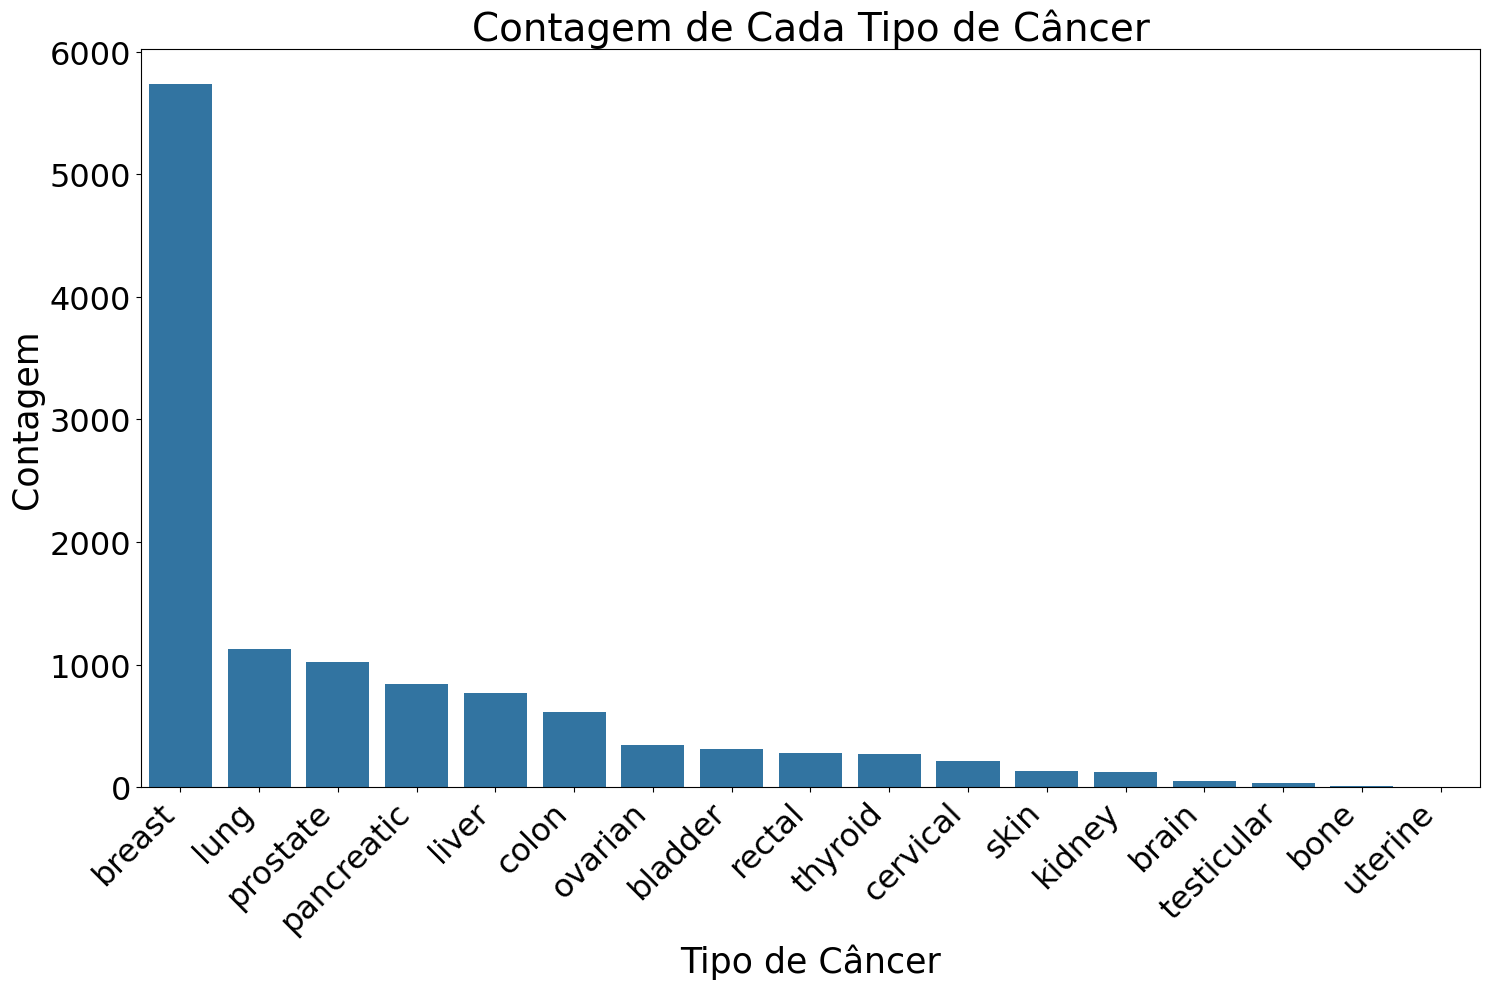

In [16]:
# Plotting using Seaborn
plt.figure(figsize=(15, 10))  # Set the figure size

# Create the barplot
sns.barplot(x='Cancer Type', y='Counts', data=cancer_type_counts_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Tipo de Câncer', fontsize=25)
plt.ylabel('Contagem', fontsize=25)
plt.title('Contagem de Cada Tipo de Câncer', fontsize=28)
plt.tick_params(labelsize=23)

# Show and save the plot
plt.tight_layout()
plt.savefig("cancer_type_counts_plot.jpg", dpi=600)  # Adjust dpi as needed
plt.show()
